[exercises](reproduction.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sfs

In [2]:
grid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.02)

In [3]:
x0 = 0, 1.5, 0
f = 1000  # Hz
omega = 2 * np.pi * f

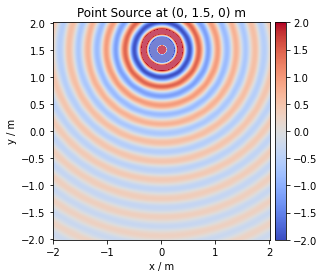

In [4]:
p_point = sfs.fd.source.point(omega, x0, grid)
p_point *= 4 * np.pi
sfs.plot2d.amplitude(p_point, grid)
plt.title("Point Source at {} m".format(x0));

In [5]:
x0 = 0, 1.5
f = 1000  # Hz
omega = 2 * np.pi * f

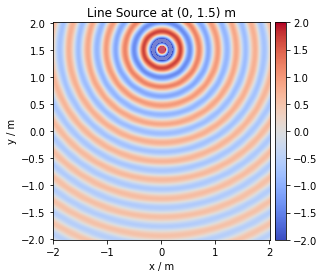

In [6]:
p_line = sfs.fd.source.line(omega, x0, grid)
p_line *= np.sqrt(8 * np.pi * omega / sfs.default.c) * np.exp(1j * np.pi / 4)
sfs.plot2d.amplitude(p_line, grid)
plt.title("Line Source at {} m".format(x0[:2]));

Difference between point source and line source:
When doubling the distance, the sound level of a ...

* ... point source is attenuated by 6 dB

* ... line source is attenuated by 3 dB

In [7]:
x0 = 0, 1.5, 0
n0 = 0, -1, 0
f = 1000  # Hz
omega = 2 * np.pi * f

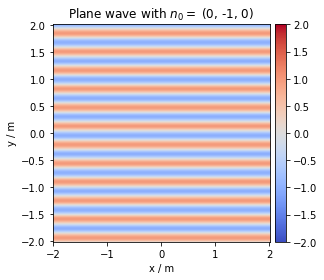

In [8]:
p_plane = sfs.fd.source.plane(omega, x0, n0, grid)
sfs.plot2d.amplitude(p_plane, grid);
plt.title("Plane wave with $n_0 =$ {}".format(n0));

From this snapshot, it's not possible to recognize if the plane wave is travelling up or down.
One would need an animation of some kind to see the direction of propagation (this was a trick question!).

The level doesn't decay over distance (another trick question!).

In [9]:
def plot_stereo(f, weights=[1,1], ax=None):
    """Plot a monochromatic stereo sound field.
    
    f: frequency in Hz
    
    """
    if ax is None:
        ax = plt.gca()
        
    omega = 2 * np.pi * f
    
    x0_1 = -0.866, 1.5, 0
    x0_2 = 0.866, 1.5, 0
    
    scaling_factor_point_source = 4 * np.pi
    weight_l, weight_r = np.asarray(weights) * scaling_factor_point_source
    grid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.02)
    
    p_1 = weight_l * sfs.fd.source.point(omega, x0_1, grid)
    p_2 = weight_r * sfs.fd.source.point(omega, x0_2, grid)
    sfs.plot2d.amplitude(p_1 + p_2, grid, ax = ax)

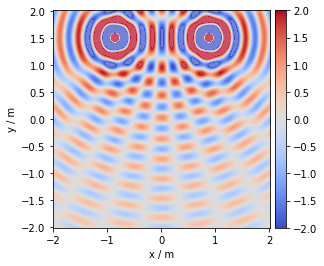

In [10]:
plot_stereo(1000)

If the weighting factors are equal, the phantom source is halfway between the two loudspeakers.

*intensity* stereophony: $6\,\text{dB}$ level difference $\frac{A_1}{A_2} = 10^\left(\frac{6}{20}\right)$

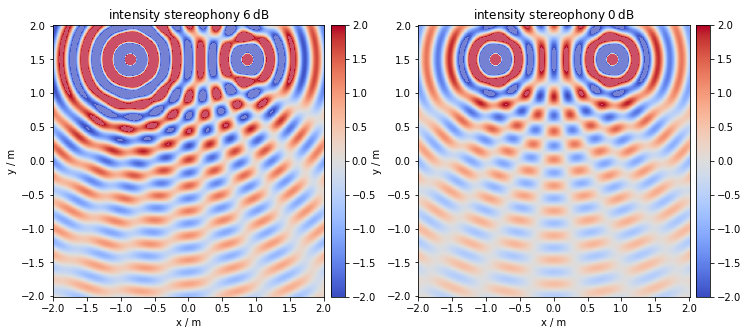

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

plot_stereo(1000, [10**(6 / 20), 1], ax=ax1)
ax1.set_title('intensity stereophony $6\,$dB')

plot_stereo(1000, [1,1], ax=ax2)
ax2.set_title('intensity stereophony $0\,$dB');

*time-of-arrival* stereophony: Change of the phase of a complex wave with $e^{\text{j}\phi}$. 

Most visible effect at $\phi=\omega \frac{T}{2}$. But since it is a psychoacoustical effect you cannot see the direction of the phantom source in the sound field.

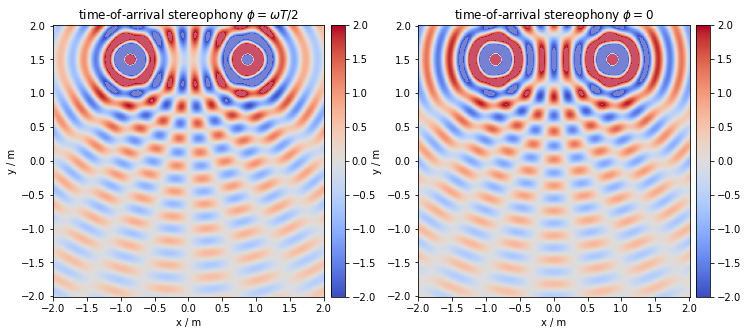

In [12]:
f = 1000
omega = 2 * np.pi * f

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

plot_stereo(f, [1, np.exp(1j * omega * 1 / (2 * f))], ax=ax1)
ax1.set_title('time-of-arrival stereophony $\phi = \omega T/2$')

plot_stereo(f, [1,1], ax=ax2)
ax2.set_title('time-of-arrival stereophony $\phi = 0$');

Wave Field Systhesis: Reason for artifacts: spatial aliasing.

2.5 D: The combination of a 2D secondary source setup with secondary sources that exhibit 3D characteristics has led to naming such configurations 2.5D synthesis. 

WFS vs. NFC-HOA artifacts: HOA has a circular area (shrinking with higher frequencies) in the center without aliasing, but around that area the artifacts are stronger than in WFS.

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>